### Importing Libraries

In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
# from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, mean_absolute_error

### Creating Dictionary For Label Mapping

In [2]:
os.chdir("D:\\Documents\\Machine_Learning\\Data\\MaliciousApps-LabelledHash")

In [3]:
extension = 'json.lbs'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:

label_dict = {}

for file in all_filenames:
	with open(file) as f:
		for line in f:
			(key, val) = line.split()
			label_dict[key] = val

label_dict

{'0962e33c9157aadbc887d8f8a61eaf90': 'smsreg',
 '0963282abde4ad96ca7bcd026bce4dd2': 'smsreg',
 '096356f0c5c6277a9d48dc6dc3a3d69d': 'dowgin',
 '0963caf3e332d99888ab541940236d82': 'shedun',
 '0964eb9807d404c8ffca21fa699a08b5': 'smsreg',
 '0965290d3b253174fd67eae3c5950c2c': 'smsreg',
 '09653281b6ccd1822331b2a7ca95374a': 'cnsms',
 '096539d3316e313cad3367f44c6b4101': 'smsreg',
 '0965b1a9327d15508fadf783e9a73131': 'smsreg',
 '09660d4a2d1abbbd5e7f7c3f96df1d43': 'qlist',
 '09666548e4f9c507ad6811b6f9157144': 'fakeinst',
 '09668ae11e3d65f706e0966ee93e32d3': 'smsdel',
 '096695ea46b58cce59f73ec19fb37279': 'smspay',
 '09669a3ac52ada0eaf725b261c853bfd': 'slocker',
 '0966eb95cc7d98acb63fb0deae98ea66': 'airpush',
 '09671ba7b0bd78ae795c0863b5091bff': 'smspay',
 '0967980ff403f632305738d09a921a61': 'triada',
 '0967b17947977fe0321175194f02c404': 'mobby',
 '09683ff631777ad40248223139feb12d': 'skymobi',
 '0968644914cedbaa3686d5f10068a80d': 'smspay',
 '0968724459ff1189e2a3cca710f76fb1': 'zdtad',
 '096872a656

### Data Loading And Processing

#### Riskware

In [5]:
os.chdir("D:\Documents\Machine_Learning\Data\Malicious-CSVs")

mal = pd.read_csv("Riskware.csv")

In [6]:
# Rename label column
mal.rename(columns = {mal.columns[0]:'Label'}, inplace = True)

In [7]:
# Label Mapping
for i in range(len(mal['Label'])):
    if (mal['Label'][i] in label_dict):
        mal['Label'][i] = label_dict[mal['Label'][i]]

C:\Users\hienl\AppData\Local\Temp/ipykernel_22004/1069262230.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
mal = mal[(mal['Label']=='smspay')|(mal['Label']=='smsreg')]

In [9]:
mal

,Label,73,0,0.1,7,18,4,3,23,2,...,0.9455,0.9456,0.9457,0.9458,0.9459,0.9460,0.9461,0.9462,0.9463,0.9464
4652,smsreg,84,0,0,14,22,11,2,28,12,...,0,0,0,0,0,0,0,0,0,0
4653,smsreg,84,0,0,14,22,11,2,28,12,...,0,0,0,0,0,0,0,0,0,0
4654,smsreg,84,0,0,15,22,13,3,31,13,...,0,0,0,0,0,0,0,0,0,0
4655,smsreg,84,0,0,15,22,13,3,31,13,...,0,0,0,0,0,0,0,0,0,0
4656,smsreg,233,0,0,18,13,10,1,19,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97343,smsreg,84,0,0,14,22,11,2,28,12,...,0,0,0,0,0,0,0,0,0,0
97344,smspay,286,0,0,4,11,0,10,22,17,...,0,0,0,0,0,0,0,0,0,0
97345,smspay,68,0,0,2,14,4,0,14,1,...,0,0,0,0,0,0,0,0,0,0
97346,smspay,309,0,0,4,13,10,13,37,18,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mal = mal.sample(frac=0.5,replace=True,random_state=1)

In [ ]:
mal.to_csv("D:\Documents\Machine_Learning\Data\Processed_Data\\final_sms.csv",index=False)

#### Benign

In [10]:
os.chdir("D:\Documents\Machine_Learning\Data\BenignCSVs")

benign = pd.read_csv("Combined_Benign.csv")

MemoryError: Unable to allocate 11.4 GiB for an array with shape (9465, 162176) and data type int64

In [ ]:
benign = benign.sample(frac=0.4,replace=True,random_state=1)

In [ ]:
#Rename label column
benign = benign.rename(columns= {benign.columns[0] : 'Label'},inplace=True)

In [ ]:
benign['Label'] = 'benign'

In [ ]:
benign.to_csv("D:\Documents\Machine_Learning\Data\Processed_Data\\final_benign.csv")

### Concatenating Benign And Malware Dataset

In [12]:
os.chdir("D:\Documents\Machine_Learning\Data\Processed_Data")

In [8]:
mal = pd.read_csv("final_sms.csv")

In [9]:
mal

,Label,73,0,0.1,7,18,4,3,23,2,...,0.9455,0.9456,0.9457,0.9458,0.9459,0.9460,0.9461,0.9462,0.9463,0.9464
0,smsreg,84,0,0,14,22,11,2,28,12,...,0,0,0,0,0,0,0,0,0,0
1,smsreg,84,0,0,15,22,13,3,31,13,...,0,0,0,0,0,0,0,0,0,0
2,smsreg,84,0,0,15,22,13,3,31,13,...,0,0,0,0,0,0,0,0,0,0
3,smsreg,65,0,0,15,15,10,8,34,15,...,0,0,0,0,0,0,0,0,0,0
4,smsreg,84,0,0,15,22,13,3,31,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39287,smspay,2,0,0,1,8,4,8,35,23,...,0,0,0,0,0,0,0,0,0,0
39288,smsreg,217,0,0,14,5,2,0,8,1,...,0,0,0,0,0,0,0,0,0,0
39289,smsreg,84,0,0,14,22,11,2,28,12,...,0,0,0,0,0,0,0,0,0,0
39290,smspay,2,0,0,1,8,4,8,35,23,...,0,0,0,0,0,0,0,0,0,0


In [13]:
benign = pd.read_csv("final_benign.csv")

In [10]:
benign

,Label,52,0,0.1,44,3,1,0.2,2,1.1,...,270,29,8,10,3525,20,157,12,5,5.1
0,benign,NaN,0,0,NaN,3.0,2,0,1.0,1,...,NaN,NaN,NaN,NaN,268.0,0.0,38.0,2.0,2.0,18.0
1,benign,288.0,0,0,4.0,7.0,2,0,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,benign,NaN,0,0,NaN,NaN,0,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,benign,NaN,0,0,NaN,0.0,0,0,1.0,1,...,NaN,NaN,NaN,NaN,20.0,0.0,4.0,1.0,1.0,1.0
4,benign,NaN,0,3,NaN,NaN,1,0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,benign,NaN,0,9,NaN,NaN,13,1,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60812,benign,NaN,0,1,NaN,NaN,3,4,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60813,benign,NaN,0,3,NaN,NaN,28,7,4.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60814,benign,NaN,0,0,NaN,0.0,0,0,1.0,1,...,NaN,NaN,NaN,NaN,32.0,0.0,616.0,1.0,0.0,0.0


In [8]:
list(mal.isna().sum().to_numpy()).count(0)

9504

In [11]:
benign.isna().sum().to_numpy()

array([    0, 48862,     0, ..., 48947, 48947, 48947], dtype=int64)

In [12]:
cleaned_benign = benign.drop(columns=[col for col in benign.columns if benign[col].isna().sum()>0])

In [13]:
cleaned_benign

,Label,0,0.1,1,0.2,1.1,0.3,0.4,0.5,1.2,...,0.9450,0.9451,0.9452,0.9453,0.9454,0.9455,0.9456,0.9457,0.9458,0.9459
0,benign,0,0,2,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,benign,0,0,2,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,benign,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,benign,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,benign,0,3,1,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,benign,0,9,13,1,1,4,1,0,3,...,0,0,0,0,0,0,0,0,0,0
60812,benign,0,1,3,4,2,8,1,3,3,...,0,0,0,0,0,0,0,0,0,0
60813,benign,0,3,28,7,2,10,0,4,4,...,0,0,0,0,0,0,0,0,0,0
60814,benign,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data = pd.concat([mal, cleaned_benign])

In [ ]:
data.to_csv("final_data.csv",index=False)

In [15]:
data['Label'].value_counts()

benign    60816
smsreg    25053
smspay    14239
Name: Label, dtype: int64

### Data Visualization

In [4]:
data = pd.read_csv("final_data.csv")

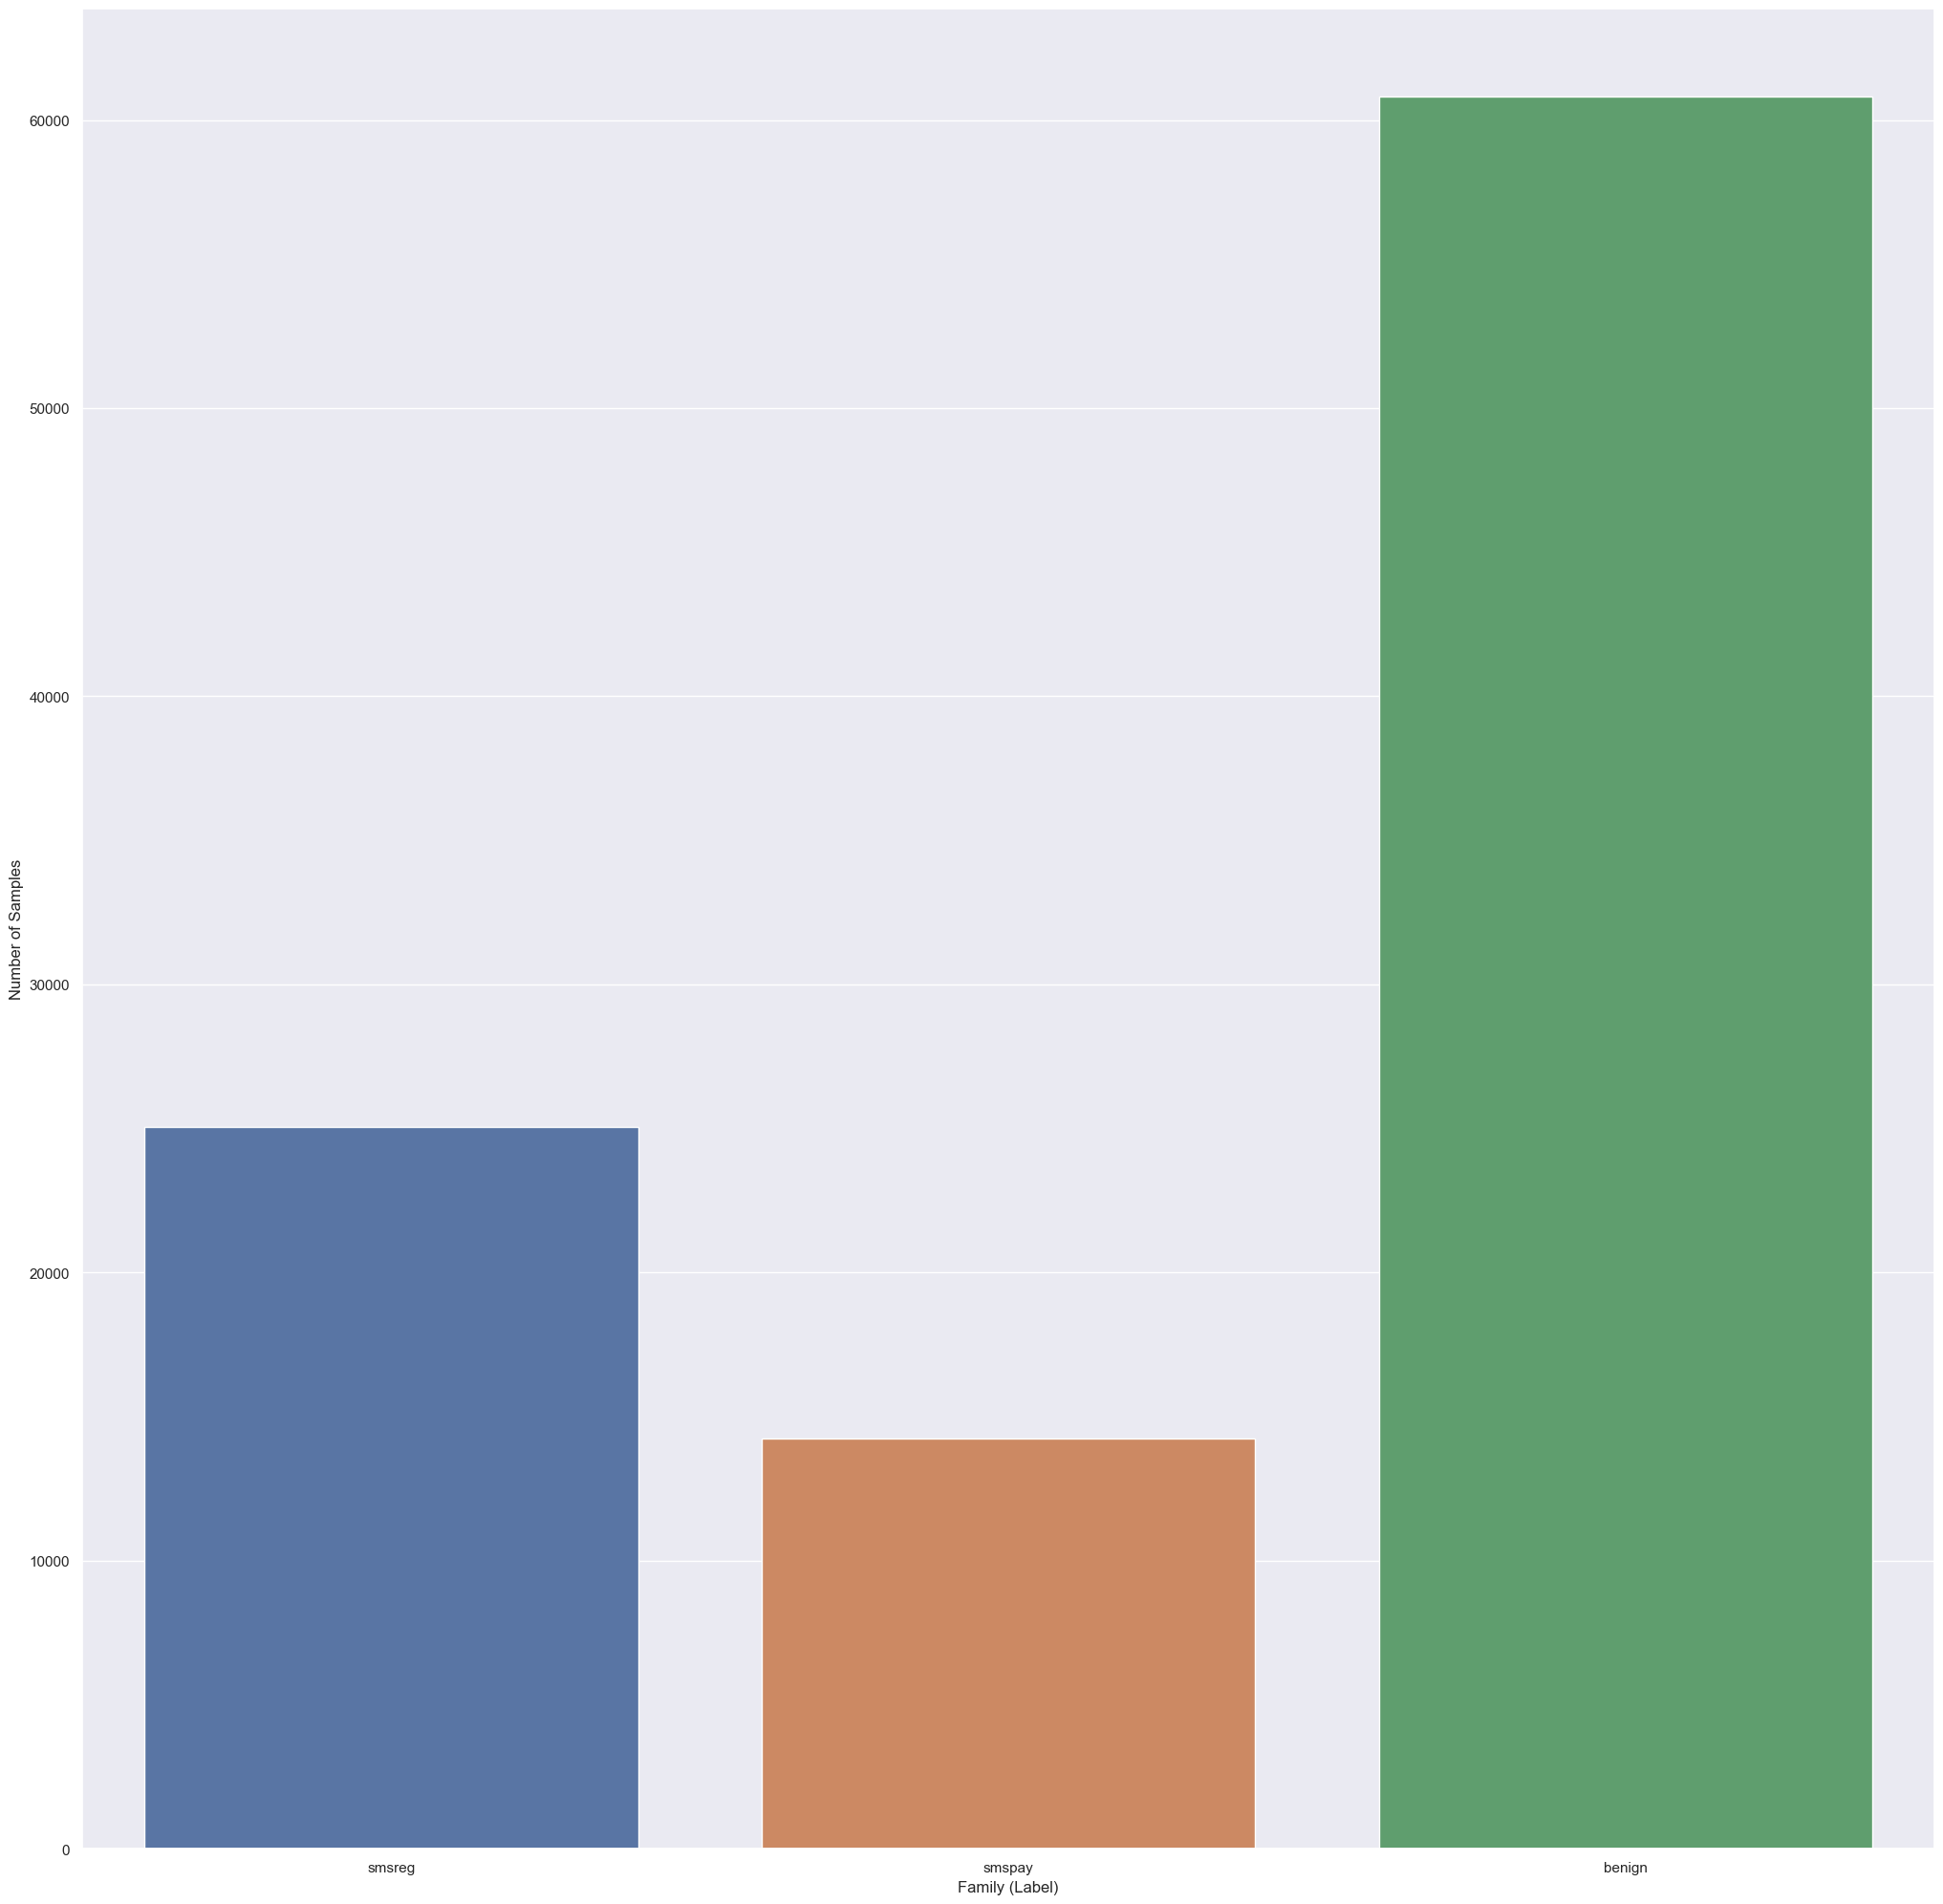

In [5]:
sns.set(rc={'figure.figsize':(25,25)})
ax = sns.countplot(x='Label', data=data)
ax.set(xlabel='Family (Label)', ylabel='Number of Samples')
plt.show()

In [7]:
list(data.isna().sum().to_numpy()).count(0)

9466

In [14]:
missing_val_cols = [col for col in data.columns if data[col].isna().sum()>0]
missing_val_cols

['73',
 '7',
 '18',
 '4',
 '3',
 '23',
 '2',
 '2.1',
 '1.5',
 '1.6',
 '1.7',
 '1.8',
 '1.9',
 '1.10',
 '1.11',
 '1.12',
 '1.13',
 '1.14',
 '1.15',
 '1.16',
 '1.17',
 '1.18',
 '1.19',
 '1.20',
 '1.21',
 '1.22',
 '1.23',
 '1.24',
 '1.25',
 '1.26',
 '1.27',
 '1.28',
 '1.29',
 '0.9460',
 '0.9461',
 '0.9462',
 '0.9463',
 '0.9464']

In [11]:
len(missing_val_cols)

38

In [13]:
cleaned_data = data.drop(columns=missing_val_cols)

In [9]:
cleaned_data

,Label,0,0.1,0.2,1,1.1,1.2,0.3,0.4,1.3,...,0.9450,0.9451,0.9452,0.9453,0.9454,0.9455,0.9456,0.9457,0.9458,0.9459
0,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,smsreg,0,0,0,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100103,benign,0,9,1,13,1,3,4,1,1,...,0,0,0,0,0,0,0,0,0,0
100104,benign,0,1,4,3,2,3,8,1,1,...,0,0,0,0,0,0,0,0,0,0
100105,benign,0,3,7,28,2,4,10,0,1,...,0,0,0,0,0,0,0,0,0,0
100106,benign,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
zero_cols = [col for col in cleaned_data.columns if list(cleaned_data[col]).count(0)==100108]
zero_cols

['0.255',
 '0.284',
 '0.352',
 '0.385',
 '0.390',
 '0.395',
 '0.400',
 '0.404',
 '0.405',
 '0.425',
 '0.432',
 '0.433',
 '0.438',
 '0.445',
 '0.454',
 '0.455',
 '0.462',
 '0.468',
 '0.469',
 '0.470',
 '0.480',
 '0.486',
 '0.488',
 '0.496',
 '0.503',
 '0.506',
 '0.507',
 '0.514',
 '0.515',
 '0.516',
 '0.517',
 '0.531',
 '0.533',
 '0.534',
 '0.535',
 '0.536',
 '0.537',
 '0.539',
 '0.540',
 '0.547',
 '0.549',
 '0.557',
 '0.558',
 '0.559',
 '0.562',
 '0.567',
 '0.569',
 '0.570',
 '0.578',
 '0.588',
 '0.589',
 '0.590',
 '0.591',
 '0.600',
 '0.606',
 '0.607',
 '0.608',
 '0.609',
 '0.615',
 '0.617',
 '0.620',
 '0.623',
 '0.627',
 '0.628',
 '0.629',
 '0.639',
 '0.646',
 '0.647',
 '0.648',
 '0.649',
 '0.650',
 '0.663',
 '0.669',
 '0.670',
 '0.672',
 '0.673',
 '0.679',
 '0.680',
 '0.688',
 '0.692',
 '0.693',
 '0.694',
 '0.696',
 '0.701',
 '0.704',
 '0.705',
 '0.709',
 '0.710',
 '0.716',
 '0.717',
 '0.720',
 '0.726',
 '0.727',
 '0.728',
 '0.733',
 '0.735',
 '0.740',
 '0.744',
 '0.749',
 '0.750',


In [16]:
len(zero_cols)

5694

In [17]:
reduced0_data = cleaned_data.drop(columns=zero_cols) 

In [15]:
reduced0_data.to_csv("reduced0_data.csv",index=False)

### Final Data

In [7]:
reduced0_data = pd.read_csv("reduced0_data.csv")

In [4]:
reduced0_data

,Label,0,0.1,0.2,1,1.1,1.2,0.3,0.4,1.3,...,0.9370,0.9372,0.9383,0.9388,0.9390,0.9393,0.9398,0.9417,0.9424,0.9451
0,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,smsreg,0,0,0,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,smsreg,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100103,benign,0,9,1,13,1,3,4,1,1,...,0,0,0,0,0,0,0,0,0,0
100104,benign,0,1,4,3,2,3,8,1,1,...,0,0,0,0,0,0,0,0,0,0
100105,benign,0,3,7,28,2,4,10,0,1,...,0,0,0,0,0,0,0,0,0,0
100106,benign,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
reduced0_data['Label'].value_counts()

benign    60816
smsreg    25053
smspay    14239
Name: Label, dtype: int64

### Label Encoding

In [9]:
le = LabelEncoder()
reduced0_data['Label'] = le.fit_transform(reduced0_data['Label'] )
reduced0_data['Label'].unique()

array([2, 1, 0])

### Shaping Data For CNN

In [10]:
label_dict = reduced0_data['Label'].value_counts().to_dict()
label_dict

{0: 60816, 2: 25053, 1: 14239}

In [11]:
lst = list(label_dict.keys())
lst

[0, 2, 1]

In [12]:
from sklearn.utils import resample

cnn_data = pd.DataFrame()
for i in list(lst):
    cnn_data = pd.concat([cnn_data,resample(reduced0_data[reduced0_data['Label']==i],n_samples=40000,random_state=1,replace=True)])

cnn_data


,Label,0,0.1,0.2,1,1.1,1.2,0.3,0.4,1.3,...,0.9370,0.9372,0.9383,0.9388,0.9390,0.9393,0.9398,0.9417,0.9424,0.9451
72295,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51464,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44484,0,0,0,15,13,12,1,6,12,1,...,0,0,0,0,0,0,0,0,0,0
71803,0,0,0,2,18,1,1,15,0,1,...,0,0,0,0,0,0,0,0,0,0
89349,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28338,1,0,0,0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3630,1,0,0,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34441,1,0,0,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24450,1,0,0,1,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


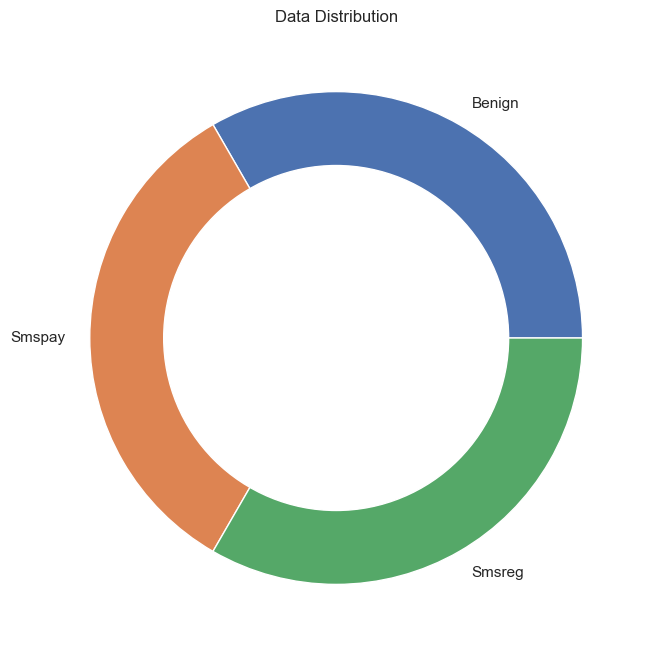

In [13]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Data Distribution')
plt.pie(cnn_data['Label'].value_counts(), labels=['Benign','Smspay','Smsreg'])
p = plt.gcf()
p.gca().add_artist(circle)

### Making X, Y

In [11]:
y = cnn_data.Label
y = y.astype('int')
X = cnn_data.loc[:, ~cnn_data.columns.isin(['Label'])]

### Features Selection

In [12]:
from sklearn.feature_selection import VarianceThreshold

normalized_df = X / X.mean()

# Init, fit VT
vt = VarianceThreshold(threshold=0.002)
_ = vt.fit(normalized_df)

# Get a boolean mask
mask = vt.get_support()

# Subset the data
X_reduced = X.loc[:, mask]
X_reduced.shape

d:\Python\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:111: RuntimeWarning:

Degrees of freedom <= 0 for slice.



(120000, 2982)

In [13]:
import numpy as np

def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()

    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Subset the matrix
    reduced_matrix = matrix.mask(mask)

    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > threshold)]

    return to_drop
     

In [14]:
to_drop = identify_correlated(X_reduced, threshold=0.8)
len(to_drop)

1200

In [15]:
X_reduced.drop(to_drop, axis=1, inplace=True)
X_reduced.shape

C:\Users\quang\AppData\Local\Temp\ipykernel_9808\3676724902.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(120000, 1782)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y,train_size=0.8,test_size=0.2,random_state=1)

In [17]:
y_train_cnn = to_categorical(y_train, num_classes=3)
y_test_cnn = to_categorical(y_test, num_classes=3)

In [18]:
X_train_cnn = X_train.iloc[:, :-1].values
X_test_cnn = X_test.iloc[:, :-1].values

In [19]:
# reshape data for CNN
X_train_cnn = X_train_cnn.reshape(len(X_train_cnn), X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(len(X_test_cnn), X_test_cnn.shape[1], 1)
X_train_cnn.shape, X_test_cnn.shape

((96000, 1781, 1), (24000, 1781, 1))

### Create CNN Model

In [20]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same', input_shape=(1781, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same', input_shape=(1781, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', padding='same', input_shape=(1781, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
cnn_model = model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1781, 64)          448       
                                                                 
 batch_normalization (BatchN  (None, 1781, 64)         256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 891, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 891, 64)           24640     
                                                                 
 batch_normalization_1 (Batc  (None, 891, 64)          256       
 hNormalization)                                                 
                                                        

In [22]:
logger = CSVLogger('logs.csv', append=True)
his = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test_cnn), callbacks=[logger])

Epoch 1/30
3000/3000 [==============================] - 405s 133ms/step - loss: 0.1072 - accuracy: 0.9576 - val_loss: 3.0332 - val_accuracy: 0.4880
Epoch 2/30
3000/3000 [==============================] - 401s 134ms/step - loss: 0.0764 - accuracy: 0.9690 - val_loss: 46.9992 - val_accuracy: 0.3380
Epoch 3/30
3000/3000 [==============================] - 406s 135ms/step - loss: 0.0694 - accuracy: 0.9720 - val_loss: 240.8944 - val_accuracy: 0.3380
Epoch 4/30
3000/3000 [==============================] - 371s 124ms/step - loss: 0.0666 - accuracy: 0.9735 - val_loss: 0.0718 - val_accuracy: 0.9740
Epoch 5/30
3000/3000 [==============================] - 359s 120ms/step - loss: 0.0622 - accuracy: 0.9750 - val_loss: 3.5849 - val_accuracy: 0.6916
Epoch 6/30
3000/3000 [==============================] - 368s 123ms/step - loss: 0.0608 - accuracy: 0.9758 - val_loss: 0.0641 - val_accuracy: 0.9760
Epoch 7/30
3000/3000 [==============================] - 366s 122ms/step - loss: 0.0589 - accuracy: 0.9764 - v

### Visualization of Results (CNN)

In [23]:
# check the model performance on test data
scores = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1] * 100))

cnn_model.save("CNN_model.h5")
print("Saved model to disk")

750/750 [==============================] - 16s 21ms/step - loss: 0.1262 - accuracy: 0.9759
accuracy: 97.59%
Saved model to disk


In [24]:
# check history of model
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

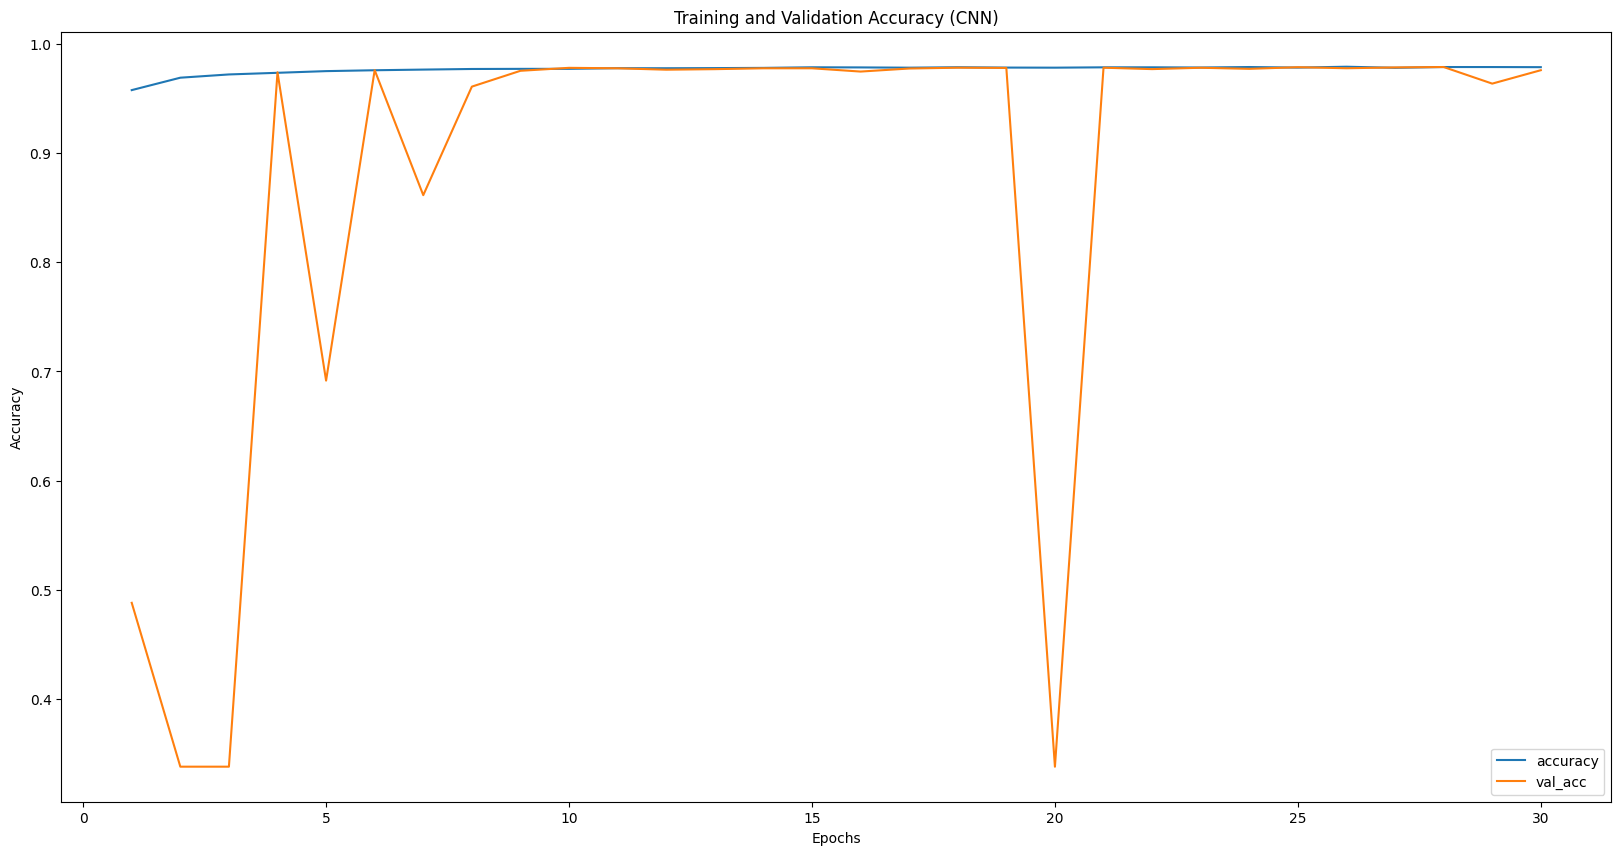

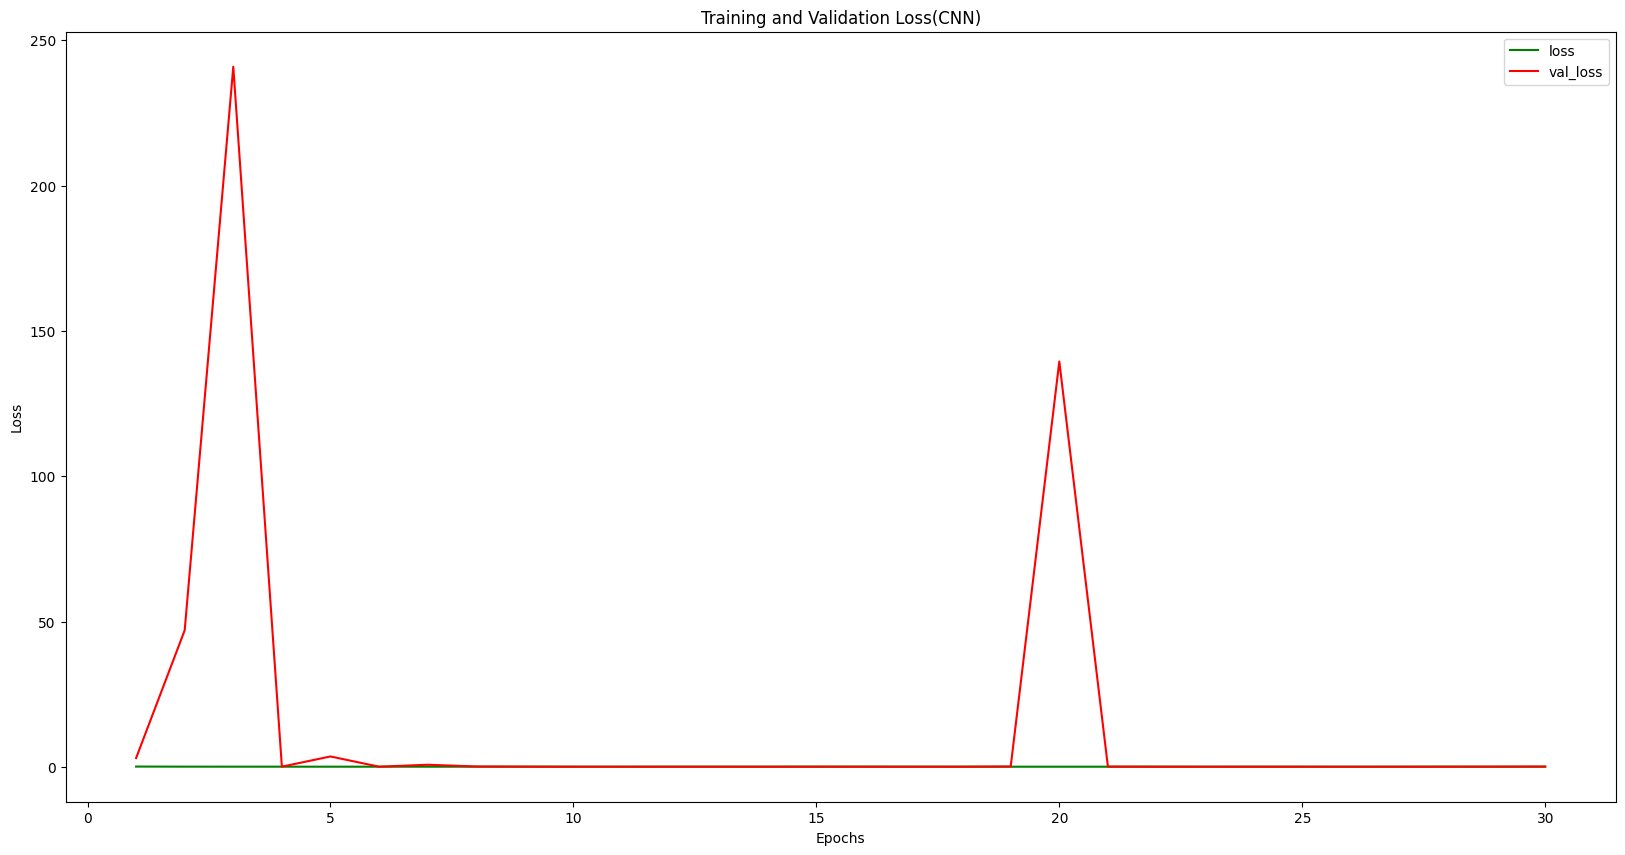

In [25]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()